# Financial Data - Advanced Analysis Techniques

## Importing Financial Data from Excel

In [66]:
import pandas as pd
import matplotlib.pyplot as plt 
plt.style.use("seaborn")

In [2]:
pd.read_excel("SP500.xls").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12107 entries, 0 to 12106
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       12107 non-null  datetime64[ns]
 1   Open       12107 non-null  float64       
 2   High       12107 non-null  float64       
 3   Low        12107 non-null  float64       
 4   Close      12107 non-null  float64       
 5   Adj Close  12107 non-null  float64       
 6   Volume     12107 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 662.2 KB


In [3]:
pd.read_excel("SP500.xls", parse_dates= ["Date"], index_col = "Date")

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1970-12-31,92.269997,92.790001,91.360001,92.150002,92.150002,13390000
1971-01-04,92.150002,92.190002,90.639999,91.150002,91.150002,10010000
1971-01-05,91.150002,92.279999,90.690002,91.800003,91.800003,12600000
1971-01-06,91.800003,93.000000,91.500000,92.349998,92.349998,16960000
1971-01-07,92.349998,93.260002,91.750000,92.379997,92.379997,16460000
...,...,...,...,...,...,...
2018-12-21,2465.379883,2504.409912,2408.550049,2416.620117,2416.620117,-980924592
2018-12-24,2400.560059,2410.340088,2351.100098,2351.100098,2351.100098,-1681037296
2018-12-26,2363.120117,2467.760010,2346.580078,2467.699951,2467.699951,-60977296


In [4]:
pd.read_excel("SP500.xls", parse_dates= ["Date"], index_col = "Date", usecols = "A, C:E")

,High,Low,Close
Date,,,
1970-12-31,92.790001,91.360001,92.150002
1971-01-04,92.190002,90.639999,91.150002
1971-01-05,92.279999,90.690002,91.800003
1971-01-06,93.000000,91.500000,92.349998
1971-01-07,93.260002,91.750000,92.379997
...,...,...,...
2018-12-21,2504.409912,2408.550049,2416.620117
2018-12-24,2410.340088,2351.100098,2351.100098
2018-12-26,2467.760010,2346.580078,2467.699951


In [5]:
pd.read_excel("SP500.xls", sheet_name= "Sales")

,Unnamed: 0,City,Sales
0,Mike,New York,25
1,Jim,Boston,43
2,Steven,London,76
3,Joe,Madrid,12
4,Tom,Paris,89


In [6]:
SP500 = pd.read_excel("SP500.xls", parse_dates= ["Date"], index_col = "Date", usecols= "A:E")

In [7]:
SP500.head()

,Open,High,Low,Close
Date,,,,
1970-12-31,92.269997,92.790001,91.360001,92.150002
1971-01-04,92.150002,92.190002,90.639999,91.150002
1971-01-05,91.150002,92.279999,90.690002,91.800003
1971-01-06,91.800003,93.000000,91.500000,92.349998
1971-01-07,92.349998,93.260002,91.750000,92.379997


In [8]:
SP500.tail()

,Open,High,Low,Close
Date,,,,
2018-12-21,2465.379883,2504.409912,2408.550049,2416.620117
2018-12-24,2400.560059,2410.340088,2351.100098,2351.100098
2018-12-26,2363.120117,2467.760010,2346.580078,2467.699951
2018-12-27,2442.500000,2489.100098,2397.939941,2488.830078
2018-12-28,2498.770020,2520.270020,2472.889893,2485.739990


In [9]:
SP500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12107 entries, 1970-12-31 to 2018-12-28
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    12107 non-null  float64
 1   High    12107 non-null  float64
 2   Low     12107 non-null  float64
 3   Close   12107 non-null  float64
dtypes: float64(4)
memory usage: 472.9 KB


In [10]:
SP500.to_csv("SP500.csv")

In [11]:
SP500.to_excel("SP500_red.xls")

/var/folders/qg/y1d1577d6_zdj2rfwsn6lwsh0000gn/T/ipykernel_6392/124282479.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  SP500.to_excel("SP500_red.xls")


## Simple Moving Averages (SMA) with rolling()

In [13]:
SP500 = pd.read_csv("SP500.csv", parse_dates = ["Date"], index_col = "Date")

In [14]:
SP500.head()

,Open,High,Low,Close
Date,,,,
1970-12-31,92.269997,92.790001,91.360001,92.150002
1971-01-04,92.150002,92.190002,90.639999,91.150002
1971-01-05,91.150002,92.279999,90.690002,91.800003
1971-01-06,91.800003,93.000000,91.500000,92.349998
1971-01-07,92.349998,93.260002,91.750000,92.379997


In [15]:
SP500.tail()

,Open,High,Low,Close
Date,,,,
2018-12-21,2465.379883,2504.409912,2408.550049,2416.620117
2018-12-24,2400.560059,2410.340088,2351.100098,2351.100098
2018-12-26,2363.120117,2467.760010,2346.580078,2467.699951
2018-12-27,2442.500000,2489.100098,2397.939941,2488.830078
2018-12-28,2498.770020,2520.270020,2472.889893,2485.739990


In [16]:
SP500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12107 entries, 1970-12-31 to 2018-12-28
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    12107 non-null  float64
 1   High    12107 non-null  float64
 2   Low     12107 non-null  float64
 3   Close   12107 non-null  float64
dtypes: float64(4)
memory usage: 472.9 KB


In [17]:
SP500 = SP500.Close.to_frame()

In [18]:
SP500.head()

,Close
Date,
1970-12-31,92.150002
1971-01-04,91.150002
1971-01-05,91.800003
1971-01-06,92.349998
1971-01-07,92.379997


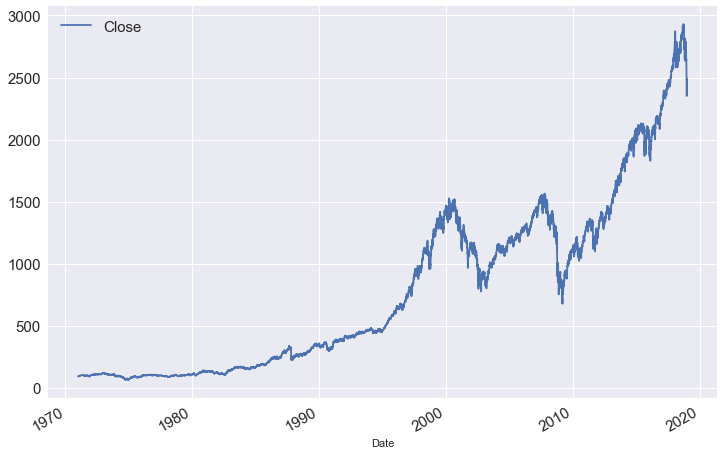

In [19]:
SP500.plot(figsize = (12,8), fontsize= 15)
plt.legend(loc = "upper left", fontsize = 15)
plt.show()

In [20]:
SP500 = SP500.loc["2008-12-31":"2018-12-31"].copy()

In [21]:
SP500.rolling(window = 10)

Rolling [window=10,center=False,axis=0,method=single]

In [22]:
type(SP500.rolling(window = 10))

pandas.core.window.rolling.Rolling

In [23]:
SP500.head(15)

,Close
Date,
2008-12-31,903.250000
2009-01-02,931.799988
2009-01-05,927.450012
2009-01-06,934.700012
2009-01-07,906.650024
2009-01-08,909.729980
2009-01-09,890.349976
2009-01-12,870.260010
2009-01-13,871.789978


In [24]:
SP500.rolling(window = 10).mean()

,Close
Date,
2008-12-31,NaN
2009-01-02,NaN
2009-01-05,NaN
2009-01-06,NaN
2009-01-07,NaN
...,...
2018-12-21,2565.915991
2018-12-24,2537.254004
2018-12-26,2520.345996


In [25]:
SP500.rolling(window = 10).mean()

,Close
Date,
2008-12-31,NaN
2009-01-02,NaN
2009-01-05,NaN
2009-01-06,NaN
2009-01-07,NaN
...,...
2018-12-21,2565.915991
2018-12-24,2537.254004
2018-12-26,2520.345996


In [26]:
SP500.rolling(window = 10, min_periods=5).mean()

,Close
Date,
2008-12-31,NaN
2009-01-02,NaN
2009-01-05,NaN
2009-01-06,NaN
2009-01-07,920.770007
...,...
2018-12-21,2565.915991
2018-12-24,2537.254004
2018-12-26,2520.345996


## Momentum Trading Strategies with SMAs

In [27]:
SP500.head()

,Close
Date,
2008-12-31,903.250000
2009-01-02,931.799988
2009-01-05,927.450012
2009-01-06,934.700012
2009-01-07,906.650024


In [28]:
SP500.tail()

,Close
Date,
2018-12-21,2416.620117
2018-12-24,2351.100098
2018-12-26,2467.699951
2018-12-27,2488.830078
2018-12-28,2485.739990


In [29]:
SP500["SMA50"] = SP500.rolling(window = 50, min_periods=50).mean()

In [30]:
SP500

,Close,SMA50
Date,,
2008-12-31,903.250000,NaN
2009-01-02,931.799988,NaN
2009-01-05,927.450012,NaN
2009-01-06,934.700012,NaN
2009-01-07,906.650024,NaN
...,...,...
2018-12-21,2416.620117,2692.420195
2018-12-24,2351.100098,2684.874795
2018-12-26,2467.699951,2678.886196


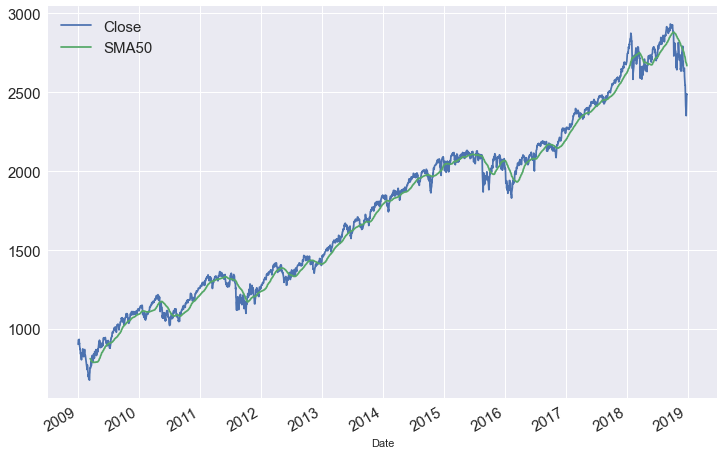

In [31]:
SP500.plot(figsize = (12, 8), fontsize = 15)
plt.legend(loc = "upper left", fontsize = 15)
plt.show()

In [32]:
SP500["SMA200"] = SP500.Close.rolling(window = 200).mean()

In [33]:
SP500.tail()

,Close,SMA50,SMA200
Date,,,
2018-12-21,2416.620117,2692.420195,2753.65980
2018-12-24,2351.100098,2684.874795,2751.48245
2018-12-26,2467.699951,2678.886196,2749.90585
2018-12-27,2488.830078,2673.646997,2748.52345
2018-12-28,2485.739990,2667.163398,2747.20475


In [34]:
SP500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2008-12-31 to 2018-12-28
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2516 non-null   float64
 1   SMA50   2467 non-null   float64
 2   SMA200  2317 non-null   float64
dtypes: float64(3)
memory usage: 78.6 KB


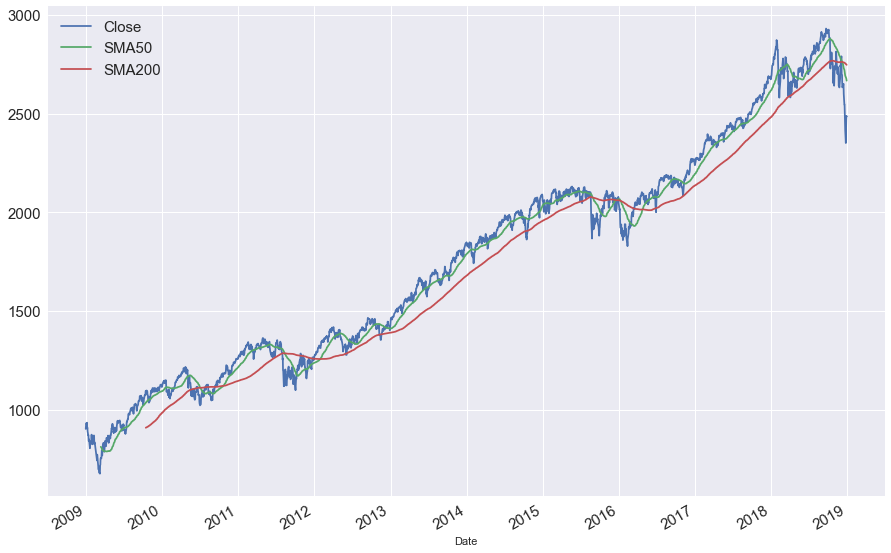

In [35]:
SP500.plot(figsize = (15,10), fontsize= 15)
plt.legend(fontsize = 15)
plt.show()

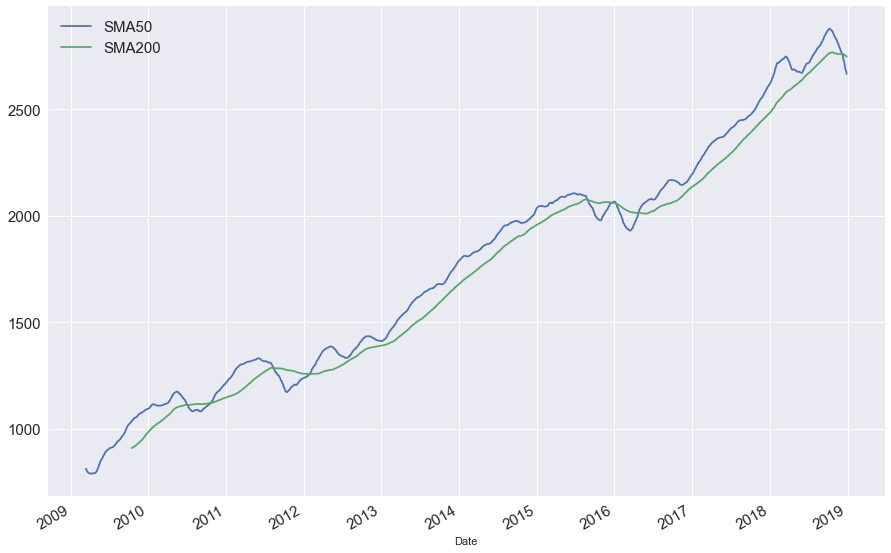

In [36]:
SP500.iloc[:,-2:].plot(figsize = (15,10), fontsize= 15)
plt.legend(fontsize = 15)
plt.show()

## Performance Reporting with rolling()

In [39]:
SP500 = pd.read_csv("SP500.csv", parse_dates= ["Date"], index_col = "Date", 
                    usecols= ["Date", "Close"])

In [40]:
SP500.head()

,Close
Date,
1970-12-31,92.150002
1971-01-04,91.150002
1971-01-05,91.800003
1971-01-06,92.349998
1971-01-07,92.379997


In [41]:
SP500.resample("M", kind = "period").last()

,Close
Date,
1970-12,92.150002
1971-01,95.879997
1971-02,96.750000
1971-03,100.309998
1971-04,103.949997
...,...
2018-08,2901.520020
2018-09,2913.979980
2018-10,2711.739990


In [42]:
month_ret = SP500.resample("M", kind = "period").last().pct_change().dropna()

In [67]:
month_ret.head()

,m_returns,1Y,3Y,5Y,10Y,20Y
Date,,,,,,
1971-01,0.040477,NaN,NaN,NaN,NaN,NaN
1971-02,0.009074,NaN,NaN,NaN,NaN,NaN
1971-03,0.036796,NaN,NaN,NaN,NaN,NaN
1971-04,0.036287,NaN,NaN,NaN,NaN,NaN
1971-05,-0.041558,NaN,NaN,NaN,NaN,NaN


In [44]:
month_ret.rolling(36).mean()*12

,Close
Date,
1971-01,NaN
1971-02,NaN
1971-03,NaN
1971-04,NaN
1971-05,NaN
...,...
2018-08,0.133653
2018-09,0.143899
2018-10,0.093103


In [45]:
month_ret["Return"] = month_ret.rolling(36).mean()*12

In [46]:
month_ret.Close.rolling(36).std()*np.sqrt(12)

Date
1971-01         NaN
1971-02         NaN
1971-03         NaN
1971-04         NaN
1971-05         NaN
             ...   
2018-08    0.094305
2018-09    0.091740
2018-10    0.093480
2018-11    0.093556
2018-12    0.111514
Freq: M, Name: Close, Length: 576, dtype: float64

In [47]:
#36 day rolling risk 
month_ret["Risk"] = month_ret.Close.rolling(36).std()*np.sqrt(12)

In [48]:
month_ret.dropna(inplace= True)

In [49]:
month_ret.head()

,Close,Return,Risk
Date,,,
1973-12,0.016569,0.026493,0.123219
1974-01,-0.010046,0.009652,0.121276
1974-02,-0.003624,0.005419,0.121201
1974-03,-0.023280,-0.014606,0.119981
1974-04,-0.039051,-0.039719,0.119791


In [50]:
month_ret.tail()

,Close,Return,Risk
Date,,,
2018-08,0.030263,0.133653,0.094305
2018-09,0.004294,0.143899,0.091740
2018-10,-0.069403,0.093103,0.093480
2018-11,0.017859,0.098888,0.093556
2018-12,-0.099425,0.071590,0.111514


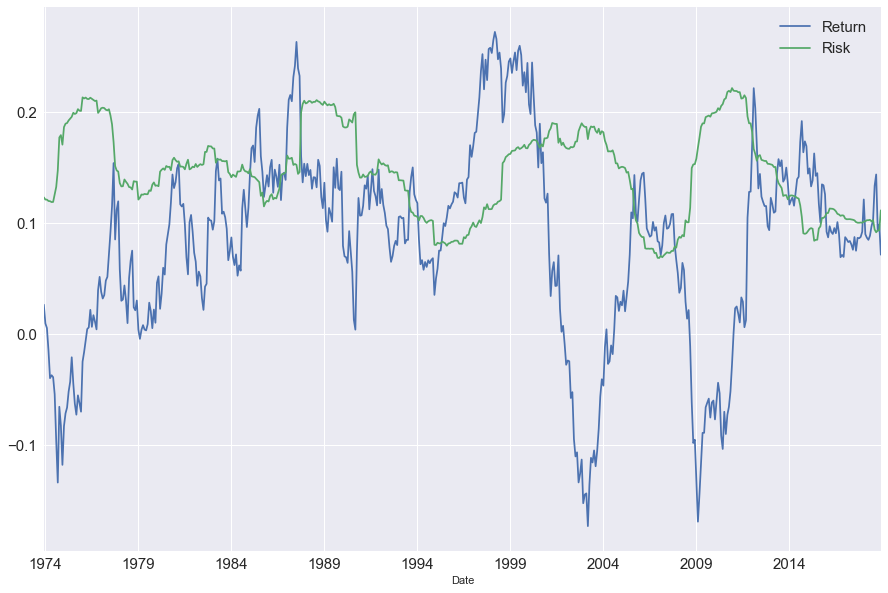

In [51]:
month_ret.iloc[:,-2:].plot(figsize = (15,10), fontsize= 15)
plt.legend(fontsize = 15)
plt.show()

In [52]:
month_ret.iloc[:,-2:].corr()

,Return,Risk
Return,1.000000,-0.327747
Risk,-0.327747,1.000000


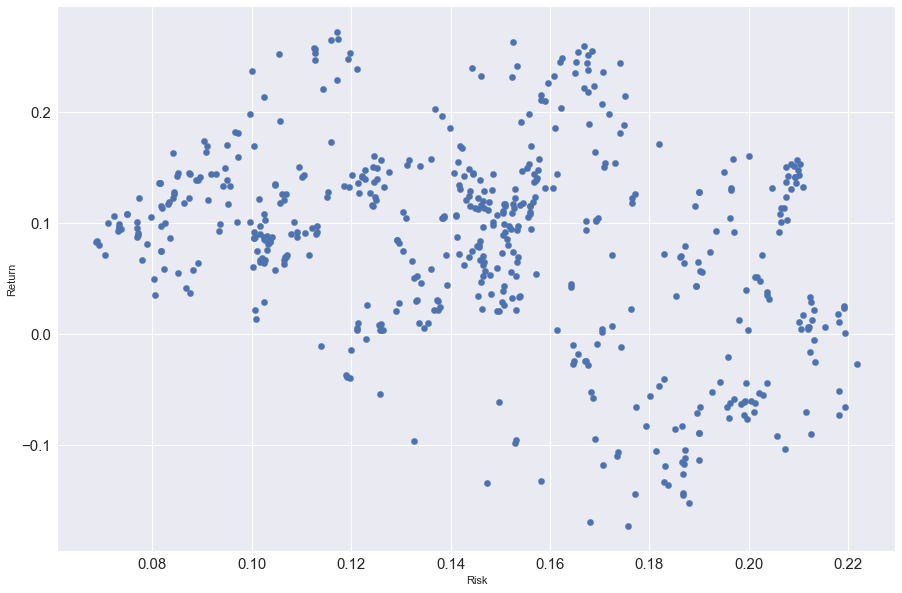

In [53]:
month_ret.iloc[:,-2:].plot(kind = "scatter", x = "Risk", y = "Return", figsize = (15,10), fontsize= 15, s = 40)
plt.show()

## Performance and Investment Periods / Time Diversification

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [55]:
SP500 = pd.read_csv("SP500.csv", parse_dates= ["Date"], index_col = "Date",
                    usecols = ["Date", "Close"])

In [56]:
SP500.head()

,Close
Date,
1970-12-31,92.150002
1971-01-04,91.150002
1971-01-05,91.800003
1971-01-06,92.349998
1971-01-07,92.379997


In [57]:
SP500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12107 entries, 1970-12-31 to 2018-12-28
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   12107 non-null  float64
dtypes: float64(1)
memory usage: 189.2 KB


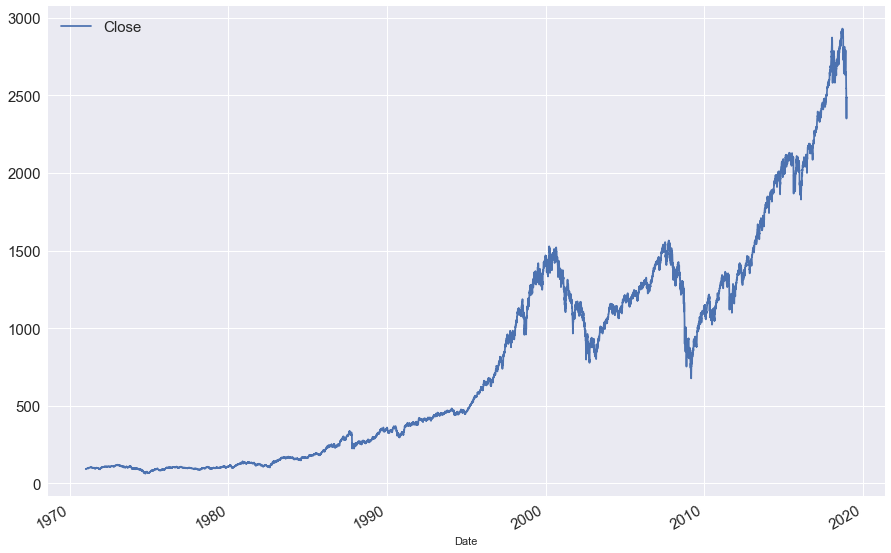

In [58]:
SP500.plot(figsize = (15,10), fontsize= 15)
plt.legend(fontsize = 15)
plt.show()

In [59]:
month_ret = SP500.resample("M", kind = "period").last().pct_change().dropna()

In [60]:
month_ret.tail()

,Close
Date,
2018-08,0.030263
2018-09,0.004294
2018-10,-0.069403
2018-11,0.017859
2018-12,-0.099425


In [61]:
month_ret.columns = ["m_returns"]

In [62]:
month_ret.rolling(3 * 12).mean()*12

,m_returns
Date,
1971-01,NaN
1971-02,NaN
1971-03,NaN
1971-04,NaN
1971-05,NaN
...,...
2018-08,0.133653
2018-09,0.143899
2018-10,0.093103


In [63]:
for years in [1, 3, 5, 10, 20]:
    month_ret["{}Y".format(years)] = month_ret.m_returns.rolling(years*12).mean()*12

In [64]:
month_ret.tail()

,m_returns,1Y,3Y,5Y,10Y,20Y
Date,,,,,,
2018-08,0.030263,0.165207,0.133653,0.119980,0.092904,0.066120
2018-09,0.004294,0.150198,0.143899,0.114889,0.102412,0.063215
2018-10,-0.069403,0.058606,0.093103,0.092089,0.112415,0.055730
2018-11,0.017859,0.048383,0.098888,0.090051,0.121685,0.053667
2018-12,-0.099425,-0.060874,0.071590,0.065453,0.110961,0.045877


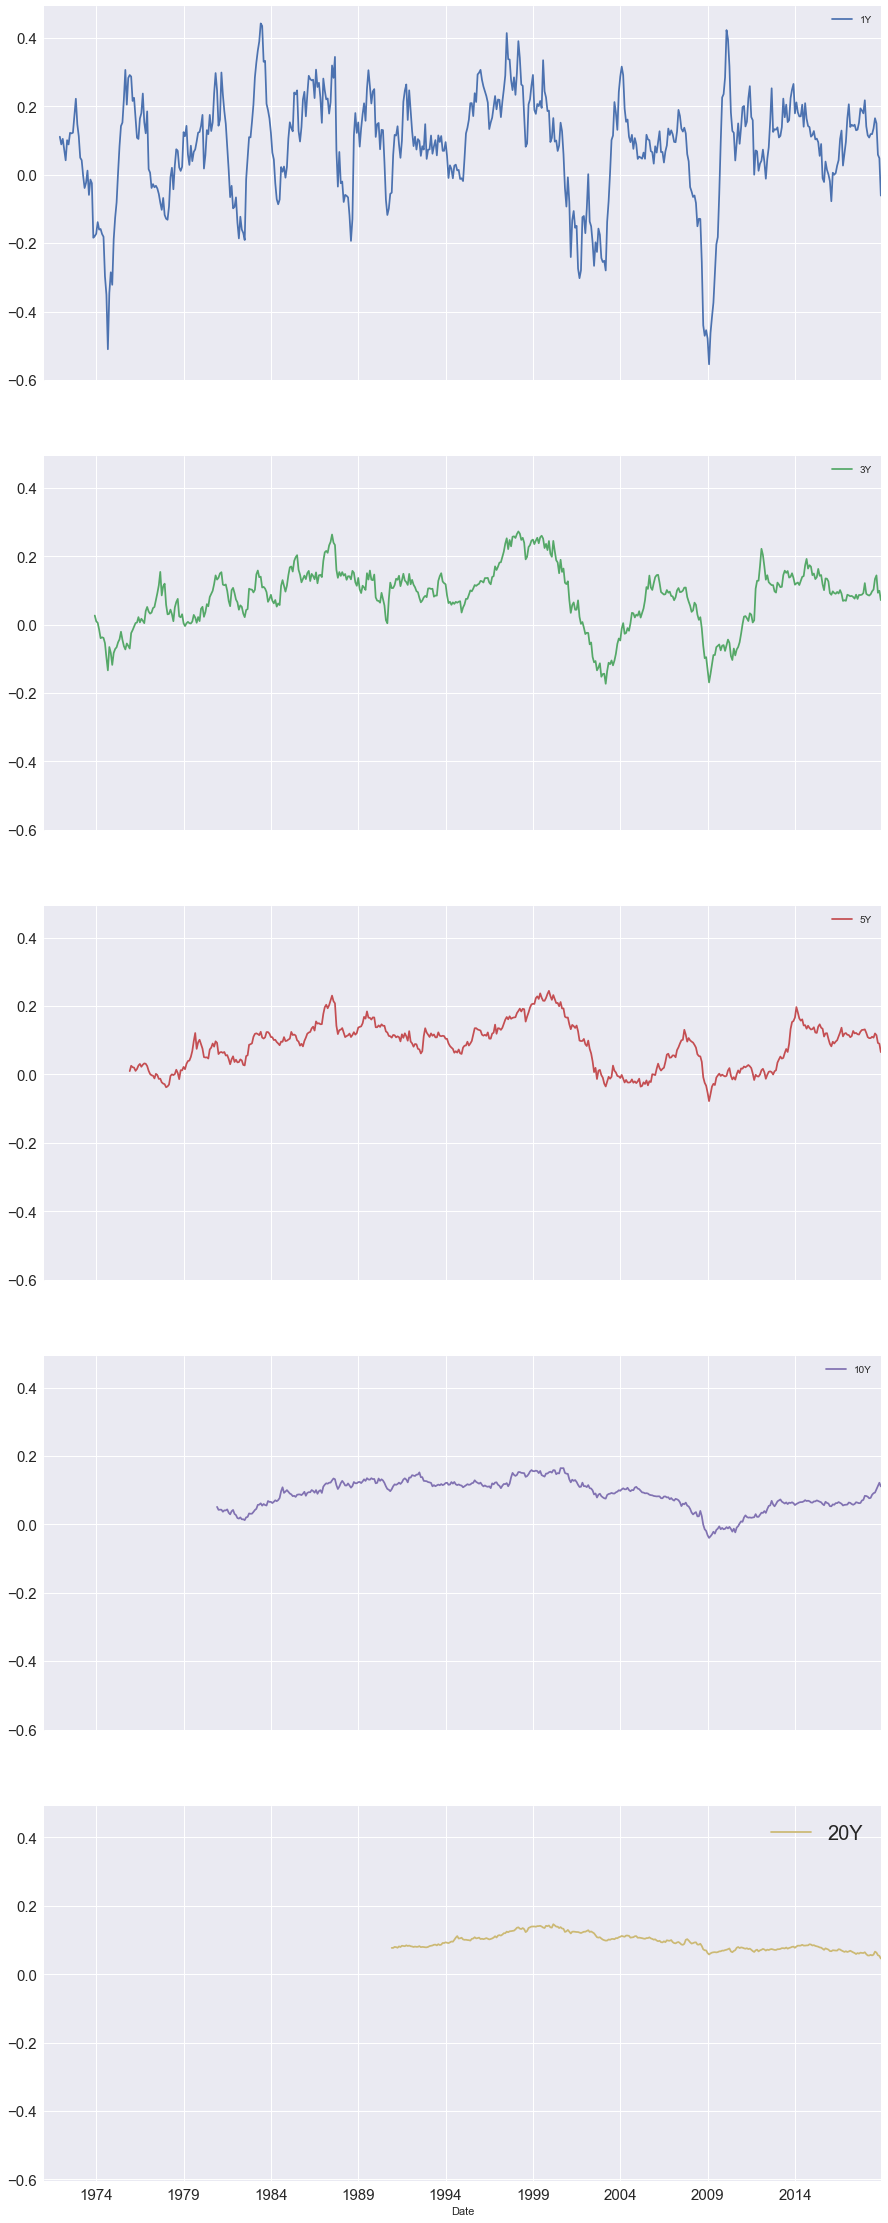

In [65]:
month_ret.iloc[:,-5:].plot(figsize = (15,40), subplots =True, fontsize= 15, sharey = True)
plt.legend(fontsize = 20)
plt.show()

## Simple Returns vs. Log Returns

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.DataFrame(index = [2016, 2017, 2018], data = [100, 50, 95], columns = ["Price"])

In [ ]:
df

In [ ]:
simple_returns = df.pct_change().dropna()
simple_returns

In [ ]:
simple_returns.mean()

In [ ]:
100 * 1.2 * 1.2

In [ ]:
df

In [ ]:
np.log(df / df.shift(1))

In [ ]:
log_returns = np.log(df / df.shift(1)).dropna()

In [ ]:
log_returns

In [ ]:
log_returns.mean()

In [ ]:
100 * np.exp(2 * log_returns.mean())

## The S&P 500 Return Triangle

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [ ]:
SP500 = pd.read_csv("SP500.csv", parse_dates= ["Date"], index_col= "Date", 
                    usecols = ["Date", "Close"])

In [ ]:
SP500.head()

In [ ]:
SP500 = SP500.loc["1988-12-30":"2018-12-31"].copy()

In [ ]:
SP500.head()

In [ ]:
annual = SP500.resample("A", kind = "period").last()
annual

In [ ]:
annual["Return"] = np.log(annual.Close / annual.Close.shift())

In [ ]:

annual.dropna(inplace = True)

In [ ]:
annual

In [ ]:
years = annual.index.size
years

In [ ]:
windows = [year for year in range(30, 0, -1)]
windows

In [ ]:
for year in windows:
    annual["{}Y".format(year)] = annual.Return.rolling(year).mean()

In [ ]:
annual

In [ ]:
triangle = annual.drop(columns = ["Close", "Return"])

In [ ]:
triangle

In [ ]:
plt.figure(figsize=(50,40))
sns.set(font_scale=1.8)
sns.heatmap(triangle, annot = True, fmt = ".1%", cmap = "RdYlGn", 
            vmin = -0.10, vmax = 0.15, center = 0)
plt.tick_params(axis = "y", labelright =True)
plt.show()

## The S&P 500 Dollar Triangle

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use("seaborn")
pd.options.display.float_format = '{:.0f}'.format

In [ ]:
SP500 = pd.read_csv("SP500.csv", parse_dates= ["Date"], index_col= "Date", 
                    usecols = ["Date", "Close"])

In [ ]:
SP500.head()

In [ ]:
SP500 = SP500.loc["1988-12-30":"2018-12-31"].copy()

In [ ]:
SP500.head()

In [ ]:
annual = SP500.resample("A", kind = "period").last()
annual

In [ ]:
annual["Return"] = np.log(annual.Close / annual.Close.shift())

In [ ]:
annual.dropna(inplace = True)

In [ ]:
annual

In [ ]:
years = annual.index.size
years

In [ ]:
windows = [year for year in range(30, 0, -1)]
windows

In [ ]:
#for year in windows:
    #annual["{}Y".format(year)] = annual.Return.rolling(year).mean()

In [ ]:
for year in windows:
    annual["{}Y".format(year)] = np.exp(year * annual.Return.rolling(year).mean()) * 100

In [ ]:
annual

In [ ]:
triangle = annual.drop(columns = ["Close", "Return"])

In [ ]:
triangle

In [ ]:
plt.figure(figsize=(50,40))
sns.set(font_scale=1.8)
sns.heatmap(triangle, annot = True, fmt = ".0f",  cmap = "RdYlGn", 
            vmin =60, vmax = 140, center = 100)
plt.tick_params(axis = "y", labelright =True)
plt.show()

## The S&P 500 Return Radar

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [ ]:
SP500 = pd.read_csv("SP500.csv", parse_dates= ["Date"], index_col= "Date", 
                    usecols = ["Date", "Close"])

In [ ]:
SP500.head()

In [ ]:
SP500 = SP500.loc["1988-12-30":"2018-12-31"].copy()

In [ ]:
SP500.head()

In [ ]:
weekly = SP500.resample("W", kind = "period").last()
weekly

In [ ]:
weekly["Return"] = np.log(weekly.Close / weekly.Close.shift())*52

In [ ]:
weekly.dropna(inplace = True)

In [ ]:
weekly

In [ ]:
weeks = weekly.index.size
weeks

In [ ]:
windows = [week for week in range(weeks, 0, -1)]
windows

In [ ]:
for week in windows:
    weekly["{}W".format(week)] = weekly.Return.rolling(week).mean()

In [ ]:
weekly

In [ ]:
triangle = weekly.drop(columns = ["Close", "Return"])

In [ ]:
triangle

In [ ]:
plt.figure(figsize=(50,40))
sns.set(font_scale=1.8)
sns.heatmap(triangle, annot =False, cmap = "RdYlGn", 
            vmin = -0.10, vmax = 0.10, center = 0)
#plt.tick_params(axis = "y", labelright =True)
plt.show()

## Exponentially-weighted Moving Averages (EWMA)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [ ]:
SP500 = pd.read_csv("SP500.csv", parse_dates= ["Date"], index_col= "Date", usecols= ["Date", "Close"])

In [ ]:
SP500.head()

In [ ]:
SP500 = SP500.loc["2008-12-31":"2018-12-31"].copy()

In [ ]:
SP500.Close.rolling(window = 10).mean()

In [ ]:
SP500.Close.ewm(span = 10, min_periods= 10).mean()

In [ ]:
SP500["SMA"] = SP500.Close.rolling(window = 100).mean()
SP500["EMA"] = SP500.Close.ewm(span = 100, min_periods= 100).mean()

In [ ]:
SP500

In [ ]:
SP500.iloc[:,-2:].plot(figsize = (15,10), fontsize =15)
plt.legend(fontsize = 15)
plt.show()

### Expanding Windows

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [ ]:
SP500 = pd.read_csv("SP500.csv", parse_dates= ["Date"], index_col= "Date", usecols= ["Date", "Close"])

In [ ]:
SP500 = SP500.loc["2008-12-31":"2018-12-31"].copy()

In [ ]:
SP500.head()

In [ ]:
SP500.Close.rolling(10).mean()

In [ ]:
SP500.Close.expanding(min_periods = 1).mean()

In [ ]:
SP500["SMA50"] = SP500.Close.rolling(50).mean()
SP500["EXP"] = SP500.Close.expanding().max()

In [ ]:
SP500.head()

In [ ]:
SP500.iloc[:, -2:].plot(figsize = (12, 8))
plt.show()

## Rolling Correlation

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [ ]:
stocks = pd.read_csv("stocks.csv", header = [0,1], index_col= [0], parse_dates= [0]).Close

In [ ]:
stocks.head()

In [ ]:
app_ba = stocks.loc["2009-12-31":"2018", ["AAPL", "BA"]]

In [ ]:
app_ba.head()

In [ ]:
month_ret = app_ba.resample("M", kind = "period").last().pct_change().dropna()

In [ ]:
month_ret.head()

In [ ]:
month_ret.tail()

In [ ]:
month_ret.info()

In [ ]:
month_ret.corr()

In [ ]:
month_ret.AAPL.rolling(36).corr(month_ret.BA)

In [ ]:
month_ret.AAPL.rolling(36).corr(month_ret.BA).plot(figsize = (12,8))
plt.show()

## rolling() with fixed-sized time offsets

In [ ]:
app_ba.head(7)

In [ ]:
app_ba.BA.rolling(window = 3).mean().head(7)

In [ ]:
app_ba.head(7)

In [ ]:
app_ba.BA.rolling(window = "3D", min_periods = 3).mean()

### Merging Time Series

In [ ]:
import pandas as pd

In [ ]:
stocks = pd.read_csv("stocks.csv", header = [0,1], index_col= [0], parse_dates= [0]).Close

In [ ]:
stocks.head()

In [ ]:
aapl = stocks.loc["2010-01-01" : "2014-12-31", "AAPL"].to_frame()
aapl.head()

In [ ]:
ba = stocks.loc["2012-01-01" : "2016-12-31", "BA"].to_frame()
ba.head()

In [ ]:
aapl["BA"] = ba.BA

In [ ]:
aapl.head()

In [ ]:
aapl.tail()

In [ ]:
aapl.dropna()

In [ ]:
ba.reindex(aapl.index).dropna()

In [ ]:
dis = stocks.loc["2010-01-01" : "2016-12-31", "DIS"].resample("W-Fri").last().to_frame()
dis.head()

In [ ]:
aapl.head()

In [ ]:
aapl["DIS"] = dis.DIS

In [ ]:
aapl.head(10)

In [ ]:
dis.reindex(aapl.index)

In [ ]:
dis["AAPL"] = aapl.AAPL

In [ ]:
dis.head(10)